In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random
import kwcoco
from pathlib import Path
from ultralytics.yolo.engine.results import Results

import utils


### COCO形式のデータセットをYOLO用に変換

In [2]:
coco = kwcoco.CocoDataset("./data_coco/sentan-B/sentan-B.json")

config_yaml = utils.coco2yolo(
                            output_dir = "./data_yolo/sentan-B",
                            train      = coco,
                            val        = coco,
                            task       = "detection",
                            exist_ok   = True
                            )

print(config_yaml)

coco2yolo:valid: 100%|██████████| 10/10 [00:00<00:00, 82.68it/s]

data_yolo\sentan-B\config.yaml


### 作成したデータセットを確認

データセットの枚数：10 枚
(790, 790)
(528, 600)
(570, 600)
(1461, 1500)
(600, 554)


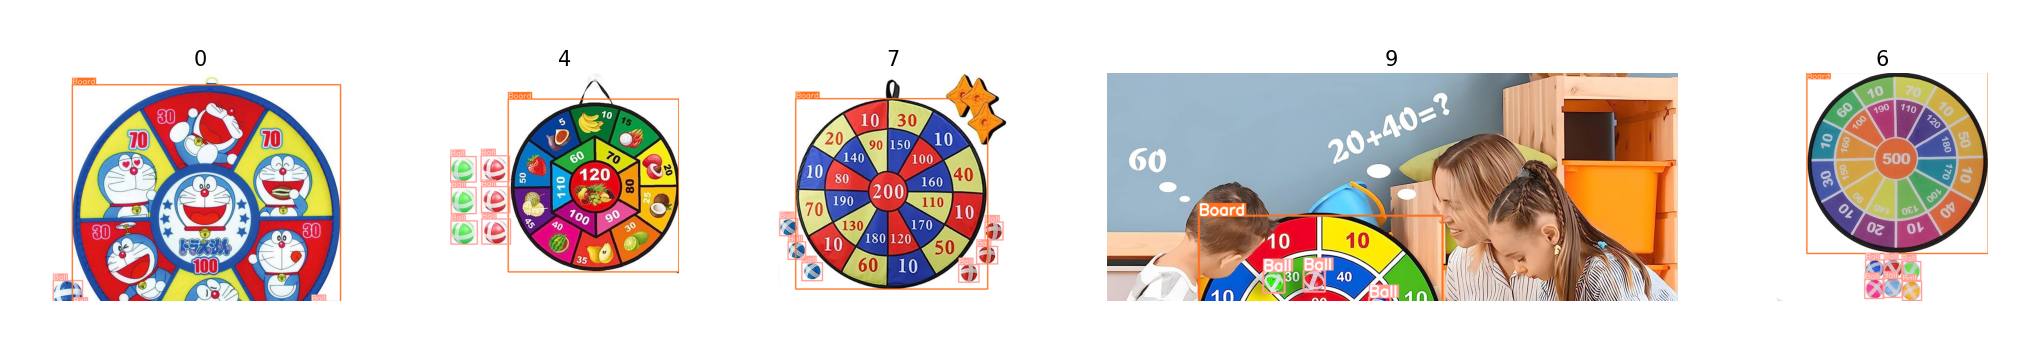

In [3]:
yolo_data_train = utils.YOLO_dataset(str(config_yaml), "train")

print(f"データセットの枚数：{len(yolo_data_train)} 枚")

imgs = {}
for i in random.sample(range(len(yolo_data_train)), 5):
    yolo_data = yolo_data_train[i]

    res = Results(
        orig_img  = yolo_data["orig_img"],
        path      = yolo_data["img_path"],
        names     = yolo_data_train.class_name,
        boxes     = yolo_data["bboxes"],
        # masks     = yolo_data["masks"],
        # keypoints = yolo_data["keypoints"],
    )

    imgs[i] = res.plot()[:, :, ::-1]

utils.show_imgs(imgs, ncol=5, dpi=500)